## Import Section

In [30]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

## Read Data

Read 2016 Shot Link - Weather data combination and then looking at the sample data, the metadata info, and summary.

In [2]:
df = pd.read_csv('../../../golf_course_project_data/combined2012to2016.zip') 

/Users/radji/miniconda3/envs/dsenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20,21,22,27,33,34,35,39,41,43,44,45,46,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity,PrecipitationType,CourseName_weather,WeatherDateAndHour,TimeDifference
0,R,PGA TOUR,2012,10,23800,656,16,Bryce,Molder,1,...,0.54,10.0,41.0,NaN,9.41,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:35:00.000000000
1,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.54,10.0,41.0,NaN,9.41,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:36:00.000000000
2,R,PGA TOUR,2012,10,23800,656,16,Bryce,Molder,1,...,0.54,10.0,41.0,NaN,9.41,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:41:00.000000000
3,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.54,10.0,41.0,NaN,9.41,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:42:00.000000000
4,R,PGA TOUR,2012,10,1116,656,16,Michael,Bradley,1,...,0.54,10.0,41.0,NaN,9.41,0.0,NaN,Plantation Course at Kapalua,2012-01-06 11:00:00,-1 days +23:45:00.000000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522327 entries, 0 to 5522326
Data columns (total 65 columns):
TourCode                   object
TourDescription            object
Year                       int64
TournamentNum              int64
PlayerNum                  int64
CourseNum                  int64
PermanentTournamentNum     int64
PlayerFirstName            object
PlayerLastName             object
Round                      int64
TournamentName             object
CourseName_shots           object
Hole                       int64
HoleScore                  float64
ParValue                   int64
Yardage                    int64
Shot                       int64
ShotType                   object
NumStrokes                 int64
FromLocationScorer         object
FromLocationEnhanced       object
ToLocationScorer           object
ToLocationEnhanced         object
Distance                   int64
DistanceToPin              int64
InTheHoleFlag              object
AroundTheGreenF

In [5]:
df.describe()

,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,Round,Hole,HoleScore,ParValue,Yardage,...,Hour,Latitude,Longitude,DegreesFahrenheit,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity
count,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.521849e+06,5.522327e+06,5.522327e+06,...,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.522327e+06,5.521234e+06,5.520552e+06,0.0,5.520566e+06,5.522327e+06
mean,2.014047e+03,2.380623e+02,2.563680e+04,4.565766e+02,1.439670e+02,2.217496e+00,9.514592e+00,4.131428e+00,4.033674e+00,4.201077e+02,...,1.284823e+01,3.384953e+01,-9.380115e+01,7.340206e+01,5.747635e-01,9.502135e+00,1.813627e+02,NaN,7.501886e+00,1.548705e-03
std,1.420210e+00,1.322603e+02,8.297281e+03,3.144095e+02,2.046469e+02,1.074742e+00,5.207157e+00,8.581288e-01,6.178643e-01,1.200210e+02,...,2.694262e+00,5.661387e+00,1.940794e+01,8.929721e+00,1.925823e-01,1.068583e+00,9.924210e+01,NaN,3.939127e+00,9.772758e-03
min,2.012000e+03,1.000000e+01,1.014000e+03,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.040000e+02,...,0.000000e+00,2.069016e+01,-1.577762e+02,3.697000e+01,5.000000e-02,9.700000e-01,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,2.013000e+03,1.300000e+02,2.296100e+04,2.400000e+01,1.100000e+01,1.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,3.860000e+02,...,1.100000e+01,2.992341e+01,-9.840082e+01,6.762000e+01,4.500000e-01,9.630000e+00,9.900000e+01,NaN,4.550000e+00,0.000000e+00
50%,2.014000e+03,2.300000e+02,2.667900e+04,6.090000e+02,2.700000e+01,2.000000e+00,1.000000e+01,4.000000e+00,4.000000e+00,4.420000e+02,...,1.300000e+01,3.364997e+01,-8.619305e+01,7.475000e+01,5.800000e-01,9.920000e+00,1.810000e+02,NaN,6.950000e+00,0.000000e+00
75%,2.015000e+03,3.400000e+02,3.092600e+04,7.290000e+02,4.570000e+02,3.000000e+00,1.400000e+01,5.000000e+00,4.000000e+00,4.900000e+02,...,1.500000e+01,3.824261e+01,-8.033770e+01,7.979000e+01,7.100000e-01,1.000000e+01,2.600000e+02,NaN,9.880000e+00,0.000000e+00
max,2.016000e+03,5.000000e+02,5.084400e+04,8.220000e+02,5.180000e+02,4.000000e+00,1.800000e+01,1.300000e+01,5.000000e+00,6.670000e+02,...,2.100000e+01,4.549330e+01,-7.122333e+01,9.977000e+01,1.000000e+00,1.000000e+01,3.590000e+02,NaN,2.396000e+01,5.134000e-01


Let's dig a little deeper on some of interesting features, such as WindSpeed or Visibility

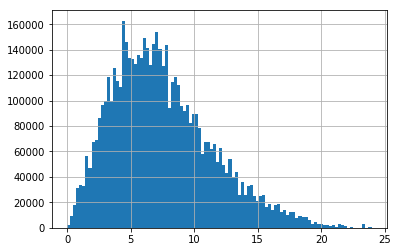

In [6]:
df['WindSpeed'].hist(bins=100)

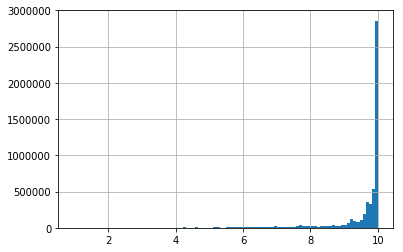

In [7]:
df['Visibility'].hist(bins=100)

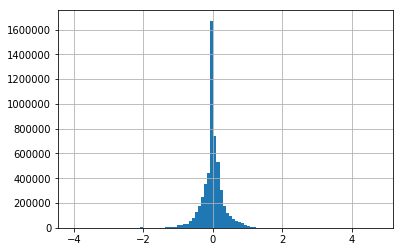

In [8]:
df['StrokesGainedBaseline'].hist(bins=100)

In [9]:
df['StrokesGainedCategory'].unique()

array(['Off the Tee', 'Approach to the Green', 'Around the Green',
       'Putting', nan], dtype=object)

### Define Features and Configure Feature Columns in TensorFlow

In [25]:
feature = df[["Visibility"]]
feature_columns = [tf.feature_column.numeric_column("Visibility")]
targets = df["StrokesGainedBaseline"]
print(feature[:5])
print(feature_columns[:5])
print(targets[:5])

   Visibility
0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
[_NumericColumn(key='Visibility', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
0    0.096
1    0.351
2    0.570
3   -0.254
4    0.369
Name: StrokesGainedBaseline, dtype: float64


## Configure Linear Regression

Configure linear regression using TensorFlow's `LinearRegressor`. This model is trained using the `GradientDescentOptimizer`, which implements Mini-Batch Stochastic Gradient Descent (SGD).

In [27]:
# Use gradient descent as the optimizer for training the model.
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kc/qhn7hlld60j2r9v2nv5kfpsm0000gn/T/tmpbcx3rac5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1b4728d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Define the Input Function
An input function is required to instruct TensorFLow how to preprocess the data, including converting the pandas feature into a dict of NumPy, then constructing a dataset object from our data before breaking it down into batches.

In [28]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

## Train the Model
call `train` function in the `LinearRegressor` object to train the model. We'll wrap `my_input_fn` in a lambda so we can pass in `feature` and `target` as arguments.

In [31]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(feature, targets),
    steps=100
)

In [ ]:
¬